In [2]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionUpscalePipeline, DiffusionPipeline, StableDiffusionDepth2ImgPipeline, DPMSolverMultistepScheduler
from diffusers import StableDiffusionImageVariationPipeline

import torch
from PIL import Image
import random
import cv2
import matplotlib.pyplot as plt

In [4]:
state = None
current_steps = 25
attn_slicing_enabled = True
#mem_eff_attn_enabled = install_xformers

#scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")
modelstr='runwayml/stable-diffusion-v1-5'
pipe = StableDiffusionPipeline.from_pretrained(
      modelstr
    ).to("cuda")
pipe.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [19]:
pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.22.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [22]:
from PIL import Image
img1=Image.open('../data/emojis/barepng/u1f004.png')
img2=Image.open('../data/emojis/barepng/u1f33d.png')
#imgtorch1=torch.tensor(img1).cuda().permute(2,0,1).unsqueeze(0).flip(1)
#imgtorch2=torch.tensor(img2).cuda().permute(2,0,1).unsqueeze(0).flip(1)
#imgtorch1=torch.nn.functional.interpolate(imgtorch1,(224,224))
#imgtorch2=torch.nn.functional.interpolate(imgtorch2,(224,224))

In [33]:
clip_inps=pipe.feature_extractor(img1)['pixel_values'][0]
clip_outs=1

In [48]:
num_inference_steps=30
device='cuda'
model_path = "../weights/finetuned_emojis"
pipe.unet.load_attn_procs(model_path)
pipe.text_encoder.load_attn_procs(model_path)

pipe.scheduler.set_timesteps(num_inference_steps, device=device)
#timesteps = pipe.scheduler.timesteps

AttributeError: 'CLIPTextModel' object has no attribute 'load_attn_procs'

In [42]:
tokens=pipe.tokenizer('beautiful sunset',return_tensors="pt")
embeds=pipe.text_encoder(tokens['input_ids'].cuda(),attention_mask=tokens['attention_mask'].cuda())[0]
negembeds=None


In [45]:
Ans=pipe('beautiful sunset emoji')

  0%|          | 0/50 [00:00<?, ?it/s]

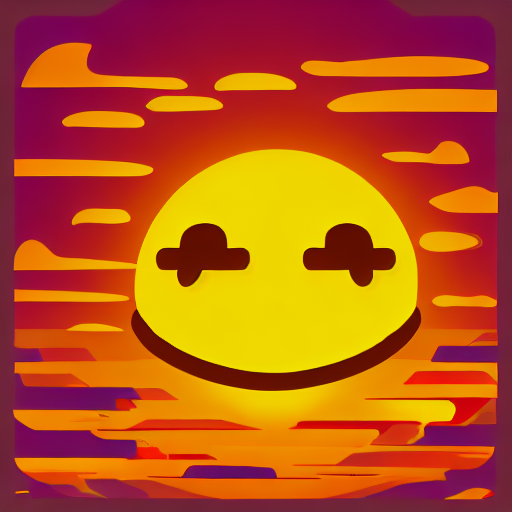

In [46]:
Ans['images'][0]

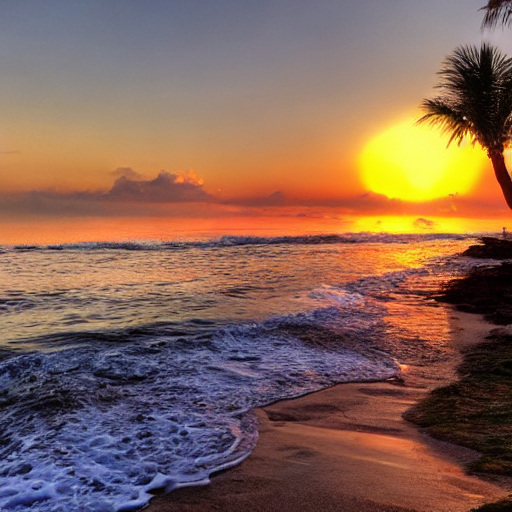

In [39]:
Ans['images'][0]

In [19]:
with torch.no_grad():
    enc1=vae.encode(imgtorch1.half()/255).latent_dist
    enc2=vae.encode(imgtorch2.half()/255).latent_dist
    #enc=enc1+enc2
    sample=enc1.mode()/2+enc2.mode()/2
    dec=vae.decode(sample).sample
    imgdec=dec[0].permute(1,2,0).detach().cpu().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


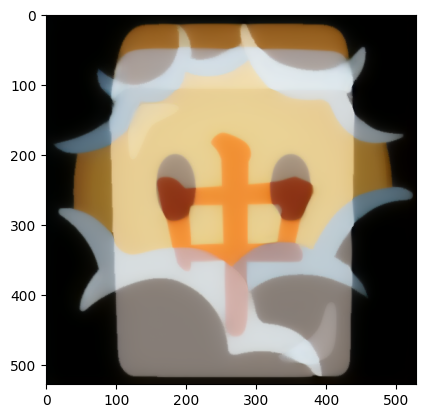

In [20]:
plt.imshow(imgdec.astype(float))